In [1]:
url_train='https://groups.csail.mit.edu/sls/downloads/movie/engtrain.bio'
url_test='https://groups.csail.mit.edu/sls/downloads/movie/engtest.bio'

# https://groups.csail.mit.edu/sls/downloads/movie/engtrain.bio
# https://groups.csail.mit.edu/sls/downloads/movie/engtest.bio

In [2]:
import wget

In [3]:
wget.download(url_train)

'engtrain (2).bio'

In [4]:
import csv
#create 2 lists, 1 for words and 1 for tags
sentences=[]
labels=[]
tokens=[]
tokens_labels=[]
unique_labels=set()

with open('engtrain.bio', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        if len(row)>0:
            tokens.append(row[0])
            tokens_labels.append(row[1])
            unique_labels.add(row[0])
        else:
            sentences.append(tokens_labels)
            labels.append(tokens)
            tokens=[]
            tokens_labels=[]
            

In [5]:
len(unique_labels)

25

In [6]:
sentences

[['what', 'movies', 'star', 'bruce', 'willis'],
 ['show', 'me', 'films', 'with', 'drew', 'barrymore', 'from', 'the', '1980s'],
 ['what',
  'movies',
  'starred',
  'both',
  'al',
  'pacino',
  'and',
  'robert',
  'deniro'],
 ['find',
  'me',
  'all',
  'of',
  'the',
  'movies',
  'that',
  'starred',
  'harold',
  'ramis',
  'and',
  'bill',
  'murray'],
 ['find',
  'me',
  'a',
  'movie',
  'with',
  'a',
  'quote',
  'about',
  'baseball',
  'in',
  'it'],
 ['what', 'movies', 'have', 'mississippi', 'in', 'the', 'title'],
 ['show',
  'me',
  'science',
  'fiction',
  'films',
  'directed',
  'by',
  'steven',
  'spielberg'],
 ['do',
  'you',
  'have',
  'any',
  'thrillers',
  'directed',
  'by',
  'sofia',
  'coppola'],
 ['what',
  'leonard',
  'cohen',
  'songs',
  'have',
  'been',
  'used',
  'in',
  'a',
  'movie'],
 ['show', 'me', 'films', 'elvis', 'films', 'set', 'in', 'hawaii'],
 ['what', 'movie', 'is', 'references', 'zydrate'],
 ['are', 'there', 'any', 'musical', 'films', 

In [7]:
[print(" ".join(sentences[i])) for i in range(10)]

what movies star bruce willis
show me films with drew barrymore from the 1980s
what movies starred both al pacino and robert deniro
find me all of the movies that starred harold ramis and bill murray
find me a movie with a quote about baseball in it
what movies have mississippi in the title
show me science fiction films directed by steven spielberg
do you have any thrillers directed by sofia coppola
what leonard cohen songs have been used in a movie
show me films elvis films set in hawaii


[None, None, None, None, None, None, None, None, None, None]

In [8]:
[print(" ".join(labels[i])) for i in range(10)]

O O O B-ACTOR I-ACTOR
O O O O B-ACTOR I-ACTOR O O B-YEAR
O O O O B-ACTOR I-ACTOR O B-ACTOR I-ACTOR
O O O O O O O O B-ACTOR I-ACTOR O B-ACTOR I-ACTOR
O O O O O O O O O O O
O O O B-TITLE O O O
O O B-GENRE I-GENRE I-GENRE O O B-DIRECTOR I-DIRECTOR
O O O O B-GENRE O O B-DIRECTOR I-DIRECTOR
O B-SONG I-SONG I-SONG O O O O O O
O O O B-ACTOR O B-PLOT I-PLOT I-PLOT


[None, None, None, None, None, None, None, None, None, None]

In [9]:
import pandas as pd
pd.DataFrame({'word':sentences[1],"labels":labels[1]})

,word,labels
0,show,O
1,me,O
2,films,O
3,with,O
4,drew,B-ACTOR
5,barrymore,I-ACTOR
6,from,O
7,the,O
8,1980s,B-YEAR


In [10]:
#next - convert tokens to sequential format

In [11]:
len(labels)

9775

In [12]:
#load tokenizer
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

c:\Users\jonlc\anaconda3\envs\bestpytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
tokenizer.encode(sentences[0])

[101, 2054, 5691, 2732, 5503, 12688, 102]

In [14]:
sentences[0]

['what', 'movies', 'star', 'bruce', 'willis']

In [15]:
tokenizer.decode([101, 2054, 5691, 2732, 5503, 12688, 102])

'[CLS] what movies star bruce willis [SEP]'

In [16]:
#max_length

In [17]:
#check length of each sentence
length=[len(tokenizer.encode(" ".join(i), add_special_tokens= True)) for i in sentences]

In [18]:
min(length), max(length)

(3, 51)

In [19]:
import numpy as np
int(np.median(length))

12

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\jonlc\AppData\Local\Temp\ipykernel_12180\2470589540.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(length, kde=False, rug=False, color="plum")


Text(0, 0.5, '# of sentences')

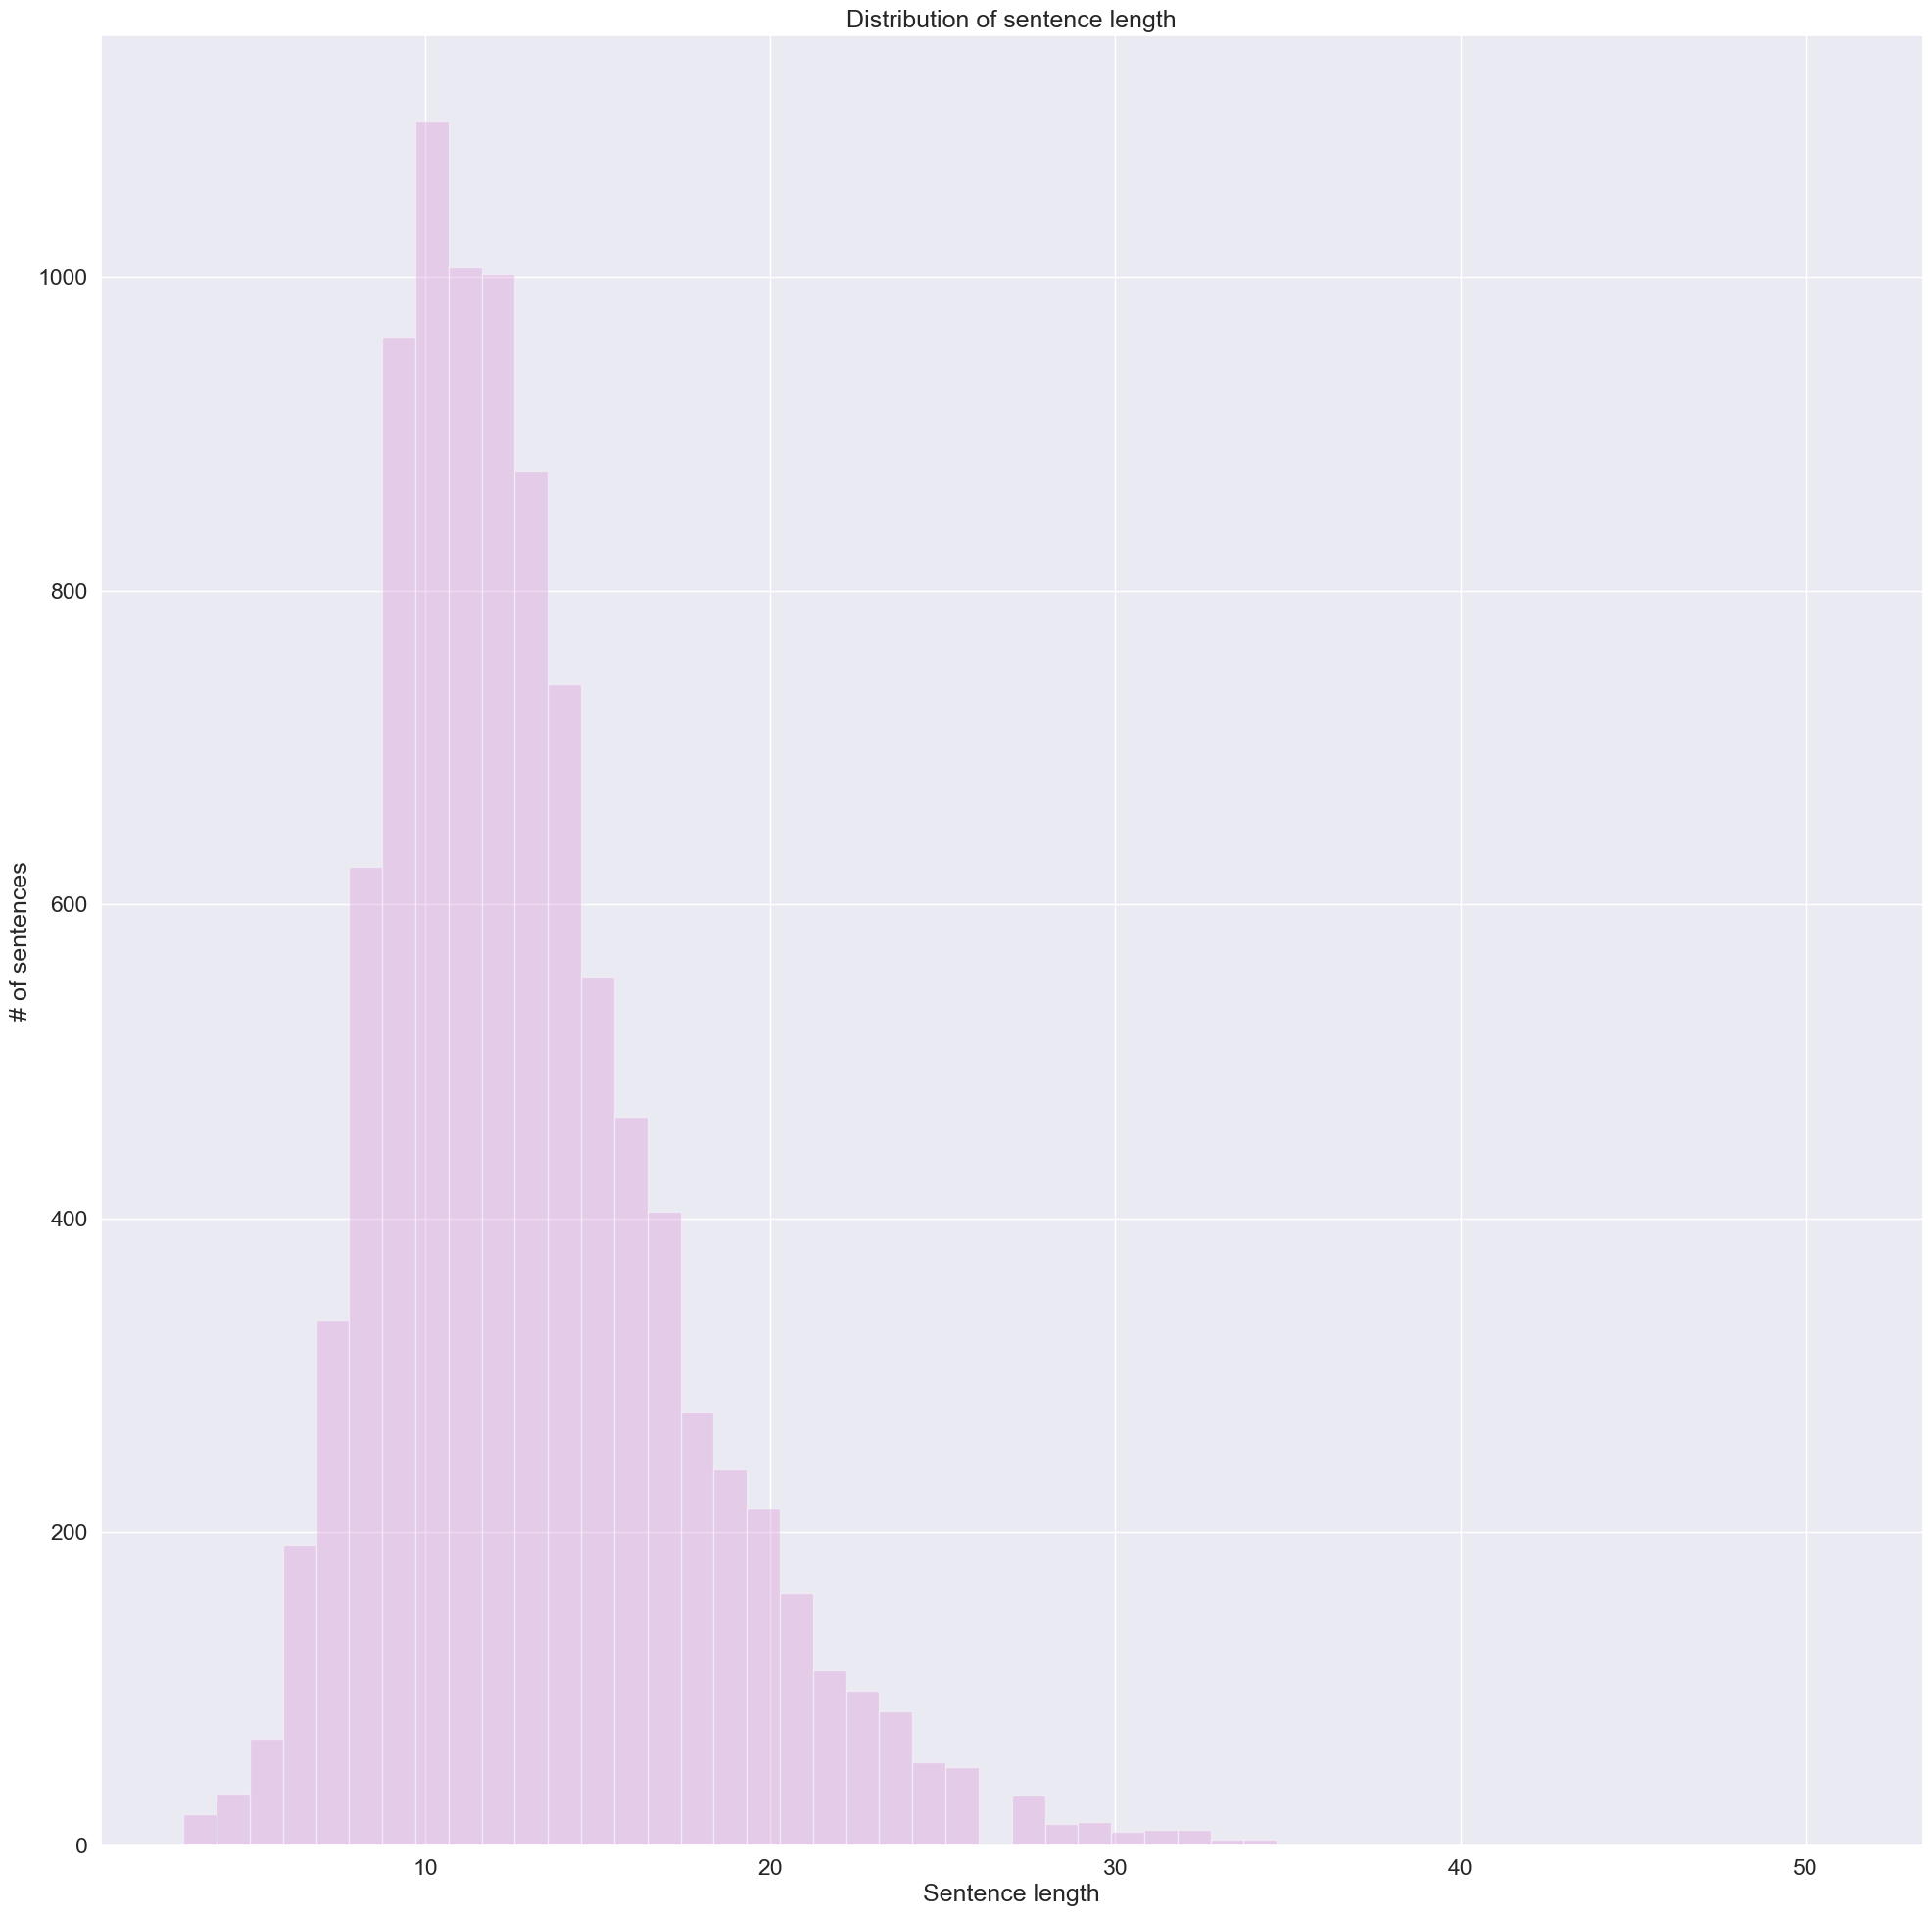

In [21]:
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(24,24))

plt.rcParams["figure.figsize"] = (10,5)

sns.distplot(length, kde=False, rug=False, color="plum")
plt.title('Distribution of sentence length')
plt.xlabel('Sentence length')
plt.ylabel('# of sentences')

In [22]:
sample = tokenizer.encode_plus(" ".join(sentences[1]), add_special_tokens= True, truncation = True, padding = "max_length", max_length=50, return_attention_mask = True, return_tensors = "pt")

In [23]:
sample

{'input_ids': tensor([[ 101, 2265, 2033, 3152, 2007, 3881, 6287, 5974, 2013, 1996, 3865,  102,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])}

In [24]:
sample["input_ids"]

tensor([[ 101, 2265, 2033, 3152, 2007, 3881, 6287, 5974, 2013, 1996, 3865,  102,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]])

In [25]:
sample["attention_mask"]

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])

In [26]:
labels[1], sample["input_ids"]

(['O', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR', 'O', 'O', 'B-YEAR'],
 tensor([[ 101, 2265, 2033, 3152, 2007, 3881, 6287, 5974, 2013, 1996, 3865,  102,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0]]))

In [27]:
#map unique labels to integers
label_map={}
for i,label in enumerate(unique_labels):
    label_map[label]=i


In [28]:
label_map

{'I-REVIEW': 0,
 'O': 1,
 'B-ACTOR': 2,
 'B-RATINGS_AVERAGE': 3,
 'I-RATINGS_AVERAGE': 4,
 'B-SONG': 5,
 'I-TITLE': 6,
 'I-SONG': 7,
 'I-YEAR': 8,
 'B-PLOT': 9,
 'B-RATING': 10,
 'I-TRAILER': 11,
 'B-DIRECTOR': 12,
 'I-RATING': 13,
 'B-TRAILER': 14,
 'B-GENRE': 15,
 'I-ACTOR': 16,
 'B-TITLE': 17,
 'I-GENRE': 18,
 'B-YEAR': 19,
 'I-DIRECTOR': 20,
 'I-PLOT': 21,
 'B-CHARACTER': 22,
 'I-CHARACTER': 23,
 'B-REVIEW': 24}

In [29]:
#store attention masks in a list
input_ids=[]
attention_masks=[]


for s in sentences:
    sent = " ".join(s) # convert to sentence
    encode = tokenizer.encode_plus(sent, add_special_tokens= True, truncation = True, pad_to_max_length=True, max_length=50, return_attention_mask = True, return_tensors = "pt")
    input_ids.append(encode["input_ids"][0])
    attention_masks.append(encode["attention_mask"][0])

c:\Users\jonlc\anaconda3\envs\bestpytorch\Lib\site-packages\transformers\tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [30]:
input_ids

[tensor([  101,  2054,  5691,  2732,  5503, 12688,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 tensor([ 101, 2265, 2033, 3152, 2007, 3881, 6287, 5974, 2013, 1996, 3865,  102,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]),
 tensor([  101,  2054,  5691,  5652,  2119,  2632, 14397,  5740,  1998,  2728,
          7939,  9711,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,    

In [31]:
attention_masks

[tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 

In [32]:
label_map

{'I-REVIEW': 0,
 'O': 1,
 'B-ACTOR': 2,
 'B-RATINGS_AVERAGE': 3,
 'I-RATINGS_AVERAGE': 4,
 'B-SONG': 5,
 'I-TITLE': 6,
 'I-SONG': 7,
 'I-YEAR': 8,
 'B-PLOT': 9,
 'B-RATING': 10,
 'I-TRAILER': 11,
 'B-DIRECTOR': 12,
 'I-RATING': 13,
 'B-TRAILER': 14,
 'B-GENRE': 15,
 'I-ACTOR': 16,
 'B-TITLE': 17,
 'I-GENRE': 18,
 'B-YEAR': 19,
 'I-DIRECTOR': 20,
 'I-PLOT': 21,
 'B-CHARACTER': 22,
 'I-CHARACTER': 23,
 'B-REVIEW': 24}

In [33]:
#convert labels to padded labels
updated_labels=[]
null_id=-100
for ids,original_labels in zip(input_ids,labels):
    j=0
    padded_labels = []

    for token in ids:
        token = token.numpy().item()
        if token==tokenizer.pad_token_id or token==tokenizer.cls_token_id or token==tokenizer.sep_token_id:
            padded_labels.append(null_id)
        elif tokenizer.ids_to_tokens[token][0:2]=="##":
            padded_labels.append(null_id)
        else:
            st = original_labels[j]
            padded_labels.append(label_map[st])
            j+=1

    assert(len(ids)==len(padded_labels))
    updated_labels.append(padded_labels)

In [34]:
len(labels)

9775

In [35]:
# import itertools
# flat_list=list(itertools.chain(*updated_labels))

In [36]:
# len(flat_list)

In [37]:
#input_ids, attention_masks, updated_labels ready (apart from tensorizing)

input_ids[0], attention_masks[0], updated_labels[0]

(tensor([  101,  2054,  5691,  2732,  5503, 12688,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 [-100,
  1,
  1,
  1,
  2,
  16,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100])

In [38]:
import torch
new_input_ids = torch.stack(input_ids, dim=0)
new_attention_masks = torch.stack(attention_masks, dim=0)
new_labels=torch.tensor(updated_labels,dtype=torch.long)

In [39]:
# new_labels = torch.flatten(new_labels)

In [40]:
len(new_input_ids), len(new_attention_masks), len(new_labels)

(9775, 9775, 9775)

In [41]:
new_input_ids,new_attention_masks, new_labels

(tensor([[ 101, 2054, 5691,  ...,    0,    0,    0],
         [ 101, 2265, 2033,  ...,    0,    0,    0],
         [ 101, 2054, 5691,  ...,    0,    0,    0],
         ...,
         [ 101, 2054, 2079,  ...,    0,    0,    0],
         [ 101, 2265, 2033,  ...,    0,    0,    0],
         [ 101, 1045, 2215,  ...,    0,    0,    0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([[-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         ...,
         [-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100]]))

In [42]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(new_input_ids, new_attention_masks, new_labels)


In [43]:
dataset

In [44]:
from torch.utils.data import random_split
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [45]:
train_size, val_size

(8797, 978)

In [46]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_data_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
validation_data_loader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

In [47]:
next(iter(train_data_loader))

[tensor([[  101,  2040,  2856,  ...,     0,     0,     0],
         [  101,  2054,  6373,  ...,     0,     0,     0],
         [  101,  2265,  2033,  ...,     0,     0,     0],
         ...,
         [  101, 10930,  4478,  ...,     0,     0,     0],
         [  101,  2424,  1037,  ...,     0,     0,     0],
         [  101,  2424,  1037,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([[-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,   15,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         ...,
         [-100,   17, -100,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100]])]

In [48]:
from transformers import BertForTokenClassification, AdamW, BertConfig
model = BertForTokenClassification.from_pretrained("bert-base-uncased", num_labels=len(label_map)+1, output_attentions = False, output_hidden_states = False)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
optimizer = AdamW(model.parameters(), lr = 5e-5, eps = 1e-8)

c:\Users\jonlc\anaconda3\envs\bestpytorch\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [123]:
from transformers import get_linear_schedule_with_warmup

epochs = 10
total_steps = len(train_data_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)


In [51]:
len(label_map)

25

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [53]:
device

device(type='cuda')

In [54]:
model.to(device)

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [122]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jon-l-collins. Use `wandb login --relogin` to force relogin


True

In [124]:
wandb.init(project="bert_trial_ner")

loss_values = []

for epoch in range(epochs):
    print("===== Epoch {:}/{:} =====".format(epoch, epochs))
    model.train() #layers of model get ready for training
    total_loss=0
    for step, batch in enumerate(train_data_loader):
        #forward pass
        if step%30==0 and not step==0:
            print("Batch {} of {}".format(step, len(train_data_loader)))
        #move batch to gpu
        #model(*kwargs) could have been used if naming convention was same as pytorch
        g_input = batch[0].to(device)
        g_attention = batch[1].to(device)
        g_labels = batch[2].to(device)
        model.zero_grad()
        outputs = model(g_input, token_type_ids=None, attention_mask=g_attention, labels=g_labels)
        loss = outputs[0]
        #collect loss from each step
        total_loss+=loss.item()
        loss.backward()
        #avoid exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    
    wandb.log({"train_loss": total_loss, "epoch": epoch})
    #calculate average loss
    average_loss = total_loss/len(train_data_loader)
    loss_values.append(average_loss)
    print("Average loss is {0:.2f}".format(average_loss))
wandb.finish()

===== Epoch 0/10 =====
Batch 30 of 275
Batch 60 of 275
Batch 90 of 275
Batch 120 of 275
Batch 150 of 275
Batch 180 of 275
Batch 210 of 275
Batch 240 of 275
Batch 270 of 275
Average loss is 0.14
===== Epoch 1/10 =====
Batch 30 of 275
Batch 60 of 275
Batch 90 of 275
Batch 120 of 275
Batch 150 of 275
Batch 180 of 275
Batch 210 of 275
Batch 240 of 275
Batch 270 of 275
Average loss is 0.10
===== Epoch 2/10 =====
Batch 30 of 275
Batch 60 of 275
Batch 90 of 275
Batch 120 of 275
Batch 150 of 275
Batch 180 of 275
Batch 210 of 275
Batch 240 of 275
Batch 270 of 275
Average loss is 0.08
===== Epoch 3/10 =====
Batch 30 of 275
Batch 60 of 275
Batch 90 of 275
Batch 120 of 275
Batch 150 of 275
Batch 180 of 275
Batch 210 of 275
Batch 240 of 275
Batch 270 of 275
Average loss is 0.05
===== Epoch 4/10 =====
Batch 30 of 275
Batch 60 of 275
Batch 90 of 275
Batch 120 of 275
Batch 150 of 275
Batch 180 of 275
Batch 210 of 275
Batch 240 of 275
Batch 270 of 275
Average loss is 0.04
===== Epoch 5/10 =====
Batch 3

epoch,▁▂▃▃▄▅▆▆▇█
train_loss,█▆▅▄▃▂▂▁▁▁
epoch,9
train_loss,1.54914


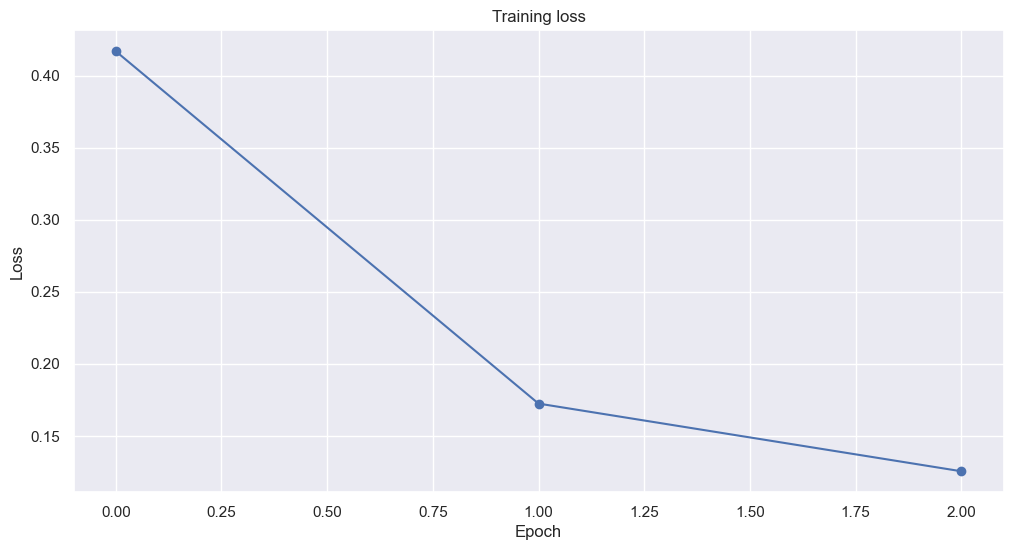

In [56]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [57]:
wget.download(url_test)

'engtest (1).bio'

In [125]:
import csv
#create 2 lists, 1 for words and 1 for tags
test_sentences=[]
test_labels=[]
tokens=[]
tokens_labels=[]
test_unique_labels=set()

with open('engtest.bio', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        if len(row)>0:
            tokens.append(row[0])
            tokens_labels.append(row[1])
            test_unique_labels.add(row[0])
        else:
            test_sentences.append(tokens_labels)
            test_labels.append(tokens)
            tokens=[]
            tokens_labels=[]
            

In [126]:
len(test_sentences), len(test_labels), len(test_unique_labels)

(2443, 2443, 25)

In [127]:
test_sentences[0]

['are', 'there', 'any', 'good', 'romantic', 'comedies', 'out', 'right', 'now']

In [128]:
#store attention masks in a list
test_input_ids=[]
test_attention_masks=[]


for s in test_sentences:
    sent = " ".join(s) # convert to sentence
    encode = tokenizer.encode_plus(sent, add_special_tokens= True, truncation = True, pad_to_max_length=True, max_length=50, return_attention_mask = True, return_tensors = "pt")
    test_input_ids.append(encode["input_ids"][0])
    test_attention_masks.append(encode["attention_mask"][0])

c:\Users\jonlc\anaconda3\envs\bestpytorch\Lib\site-packages\transformers\tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [129]:
test_sentences[0]

['are', 'there', 'any', 'good', 'romantic', 'comedies', 'out', 'right', 'now']

In [130]:
test_input_ids[0]

tensor([  101,  2024,  2045,  2151,  2204,  6298, 22092,  2041,  2157,  2085,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [131]:
test_attention_masks[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

In [132]:
#test labels need to be padded (avoid size mismatch)
test_labels


[['O', 'O', 'O', 'O', 'B-GENRE', 'I-GENRE', 'O', 'B-YEAR', 'I-YEAR'],
 ['O', 'O', 'O', 'O', 'O', 'B-PLOT', 'I-PLOT', 'I-PLOT'],
 ['O',
  'O',
  'B-RATINGS_AVERAGE',
  'I-RATINGS_AVERAGE',
  'O',
  'O',
  'O',
  'B-ACTOR',
  'I-ACTOR'],
 ['O', 'B-GENRE', 'I-GENRE', 'O', 'O', 'O', 'O', 'B-YEAR'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-TITLE', 'I-TITLE', 'O'],
 ['O', 'O', 'B-YEAR', 'B-GENRE', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-TITLE',
  'I-TITLE',
  'I-TITLE'],
 ['O', 'O', 'O', 'O', 'B-SONG', 'O', 'O', 'B-TITLE', 'I-TITLE', 'I-TITLE'],
 ['O', 'O', 'B-GENRE', 'I-GENRE', 'O', 'B-YEAR', 'I-YEAR'],
 ['O', 'O', 'O', 'O', 'B-YEAR', 'O', 'O', 'B-ACTOR', 'I-ACTOR'],
 ['O', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR', 'O', 'O', 'B-CHARACTER'],
 ['O', 'B-ACTOR', 'I-ACTOR', 'O', 'O', 'B-GENRE', 'O', 'O', 'B-YEAR'],
 ['O', 'O', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR', 'O', 'B-ACTOR', 'I-ACTOR'],
 ['O', 'O', 'O', 'B-TITLE', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 

In [133]:
#convert labels to padded labels
test_updated_labels=[]
null_id=-100
for ids,original_labels in zip(test_input_ids,test_labels):
    j=0
    padded_labels = []

    for token in ids:
        token = token.numpy().item()
        if token==tokenizer.pad_token_id or token==tokenizer.cls_token_id or token==tokenizer.sep_token_id:
            padded_labels.append(null_id)
        elif tokenizer.ids_to_tokens[token][0:2]=="##":
            padded_labels.append(null_id)
        else:
            st = original_labels[j]
            padded_labels.append(label_map[st])
            j+=1

    assert(len(ids)==len(padded_labels))
    test_updated_labels.append(padded_labels)

In [134]:
len(test_updated_labels), len(test_input_ids), len(test_attention_masks)

(2443, 2443, 2443)

In [135]:
test_sentences[3]

['what', 'science', 'fiction', 'films', 'have', 'come', 'out', 'recently']

In [136]:
test_input_ids[3]

tensor([ 101, 2054, 2671, 4349, 3152, 2031, 2272, 2041, 3728,  102,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0])

In [137]:
test_input_ids = torch.stack(test_input_ids, dim=0)
test_attention_masks = torch.stack(test_attention_masks, dim=0)
test_labels=torch.tensor(test_updated_labels,dtype=torch.long)

In [138]:
len(test_input_ids), len(test_attention_masks), len(test_labels)

(2443, 2443, 2443)

In [139]:
batch_size = 32
prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [140]:
prediction_dataloader

In [141]:
next(iter(prediction_dataloader))

[tensor([[ 101, 2024, 2045,  ...,    0,    0,    0],
         [ 101, 2265, 2033,  ...,    0,    0,    0],
         [ 101, 2862, 1996,  ...,    0,    0,    0],
         ...,
         [ 101, 2003, 2045,  ...,    0,    0,    0],
         [ 101, 2054, 5691,  ...,    0,    0,    0],
         [ 101, 2424, 5691,  ...,    0,    0,    0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([[-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         ...,
         [-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100],
         [-100,    1,    1,  ..., -100, -100, -100]])]

In [142]:
model.eval()
predictions, true_labels = [], []
for batch in prediction_dataloader:
    batch = tuple(t.to(device) for t in batch)
    g_input_ids, g_input_mask, g_labels = batch
    with torch.no_grad():
        outputs = model(g_input_ids, token_type_ids=None, attention_mask=g_input_mask)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = g_labels.to('cpu').numpy()
    predictions.append(logits)
    true_labels.append(label_ids)

In [143]:
true_labels[0]

array([[-100,    1,    1, ..., -100, -100, -100],
       [-100,    1,    1, ..., -100, -100, -100],
       [-100,    1,    1, ..., -100, -100, -100],
       ...,
       [-100,    1,    1, ..., -100, -100, -100],
       [-100,    1,    1, ..., -100, -100, -100],
       [-100,    1,    1, ..., -100, -100, -100]], dtype=int64)

In [144]:
import numpy as np
pred = np.concatenate(predictions, axis=0)
ground = np.concatenate(true_labels, axis=0)

In [145]:
pred.shape, ground.shape

((2443, 50, 26), (2443, 50))

In [146]:
pred_labels = np.argmax(pred, axis=2)

In [147]:
pred_labels.shape

(2443, 50)

In [148]:
pred_flat = np.concatenate(pred_labels, axis=0)
ground_flat = np.concatenate(ground, axis=0)

In [149]:
pred_flat.shape, ground_flat.shape

((122150,), (122150,))

In [150]:
#removing for null label ids
new_pred_flat = []
new_ground_flat = []
for i in range(len(ground_flat)):
    if ground_flat[i]!=-100:
        new_pred_flat.append(pred_flat[i])
        new_ground_flat.append(ground_flat[i])

In [151]:
len(new_pred_flat), len(new_ground_flat)

(24686, 24686)

In [152]:
from sklearn.metrics import classification_report, f1_score

In [153]:
f1 = f1_score(new_ground_flat, new_pred_flat, average='micro')
print("F1 score is {}".format(f1))

F1 score is 0.9435307461719193


In [154]:
x = classification_report(new_ground_flat, new_pred_flat)
print(x)

              precision    recall  f1-score   support

           0       0.50      0.20      0.29        45
           1       0.97      0.98      0.97     14929
           2       0.91      0.96      0.94       812
           3       0.92      0.91      0.91       451
           4       0.89      0.89      0.89       403
           5       0.69      0.69      0.69        54
           6       0.92      0.93      0.93       856
           7       0.88      0.78      0.83       119
           8       0.96      0.98      0.97       610
           9       0.75      0.78      0.77       491
          10       0.97      0.96      0.97       500
          11       0.00      0.00      0.00         8
          12       0.95      0.86      0.90       456
          13       0.93      0.94      0.94       226
          14       0.81      0.87      0.84        30
          15       0.94      0.96      0.95      1117
          16       0.92      0.95      0.93       862
          17       0.89    

c:\Users\jonlc\anaconda3\envs\bestpytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonlc\anaconda3\envs\bestpytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonlc\anaconda3\envs\bestpytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
sentence =  "Characterized by its use of Technicolor, fantasy storytelling, musical score, and memorable characters, the film has become an American pop culture icon. It was nominated for six Academy Awards, including Best Picture, but lost to Gone with the Wind, also directed by Fleming."

In [175]:
id_Sentence = tokenizer.encode(sentence)

In [176]:
id_Sentence

[101,
 7356,
 2011,
 2049,
 2224,
 1997,
 6627,
 8713,
 12898,
 2099,
 1010,
 5913,
 20957,
 1010,
 3315,
 3556,
 1010,
 1998,
 13432,
 3494,
 1010,
 1996,
 2143,
 2038,
 2468,
 2019,
 2137,
 3769,
 3226,
 12696,
 1012,
 2009,
 2001,
 4222,
 2005,
 2416,
 2914,
 2982,
 1010,
 2164,
 2190,
 3861,
 1010,
 2021,
 2439,
 2000,
 2908,
 2007,
 1996,
 3612,
 1010,
 2036,
 2856,
 2011,
 13779,
 1012,
 102]

In [177]:
input_ids = torch.tensor([id_Sentence])

In [178]:
input_ids = input_ids.cuda()

In [179]:
#pass to model
with torch.no_grad():
    output=model(input_ids)

In [180]:
output

TokenClassifierOutput(loss=None, logits=tensor([[[-0.0388,  9.5412, -0.3798,  ..., -1.4610,  0.8291, -3.6704],
         [-0.7320, 11.2266, -0.7623,  ..., -1.4001,  0.2116, -4.3973],
         [-0.3550, 11.3256, -0.9033,  ..., -1.1637, -0.2664, -4.3264],
         ...,
         [-0.5903,  0.4218, -0.2541,  ..., -0.1867, -0.7297, -1.4035],
         [ 1.0895,  7.4651, -0.7523,  ..., -1.4838,  0.5770, -3.1291],
         [ 0.9987,  7.7897, -0.8580,  ..., -1.5381,  0.7242, -3.2985]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [181]:
output.logits.shape

torch.Size([1, 57, 26])

In [182]:
input_ids.shape

torch.Size([1, 57])

In [183]:
label_indices = np.argmax(output.logits.to('cpu').numpy(), axis=2)[0]

In [184]:
def get_key(value):
    for key, val in label_map.items():
        if val==value:
            return key
    return "key doesn't exist"

In [185]:
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])

In [186]:
tokens

['[CLS]',
 'characterized',
 'by',
 'its',
 'use',
 'of',
 'tech',
 '##nic',
 '##olo',
 '##r',
 ',',
 'fantasy',
 'storytelling',
 ',',
 'musical',
 'score',
 ',',
 'and',
 'memorable',
 'characters',
 ',',
 'the',
 'film',
 'has',
 'become',
 'an',
 'american',
 'pop',
 'culture',
 'icon',
 '.',
 'it',
 'was',
 'nominated',
 'for',
 'six',
 'academy',
 'awards',
 ',',
 'including',
 'best',
 'picture',
 ',',
 'but',
 'lost',
 'to',
 'gone',
 'with',
 'the',
 'wind',
 ',',
 'also',
 'directed',
 'by',
 'fleming',
 '.',
 '[SEP]']

In [187]:
len(tokens),len(label_indices)

(57, 57)

In [188]:
new_token, new_label = [], []

In [189]:
for token,index in zip(tokens,label_indices):
    if token.startswith("##"):
        new_token[-1] = new_token[-1]+token[2:]
    else:
        new_token.append(token)
        new_label.append(get_key(index))

In [190]:
len(new_token), len(new_label)

(54, 54)

In [191]:
import pandas as pd
df = pd.DataFrame({'Tokens':new_token, 'Entity_Labels':new_label})

In [192]:
df

,Tokens,Entity_Labels
0,[CLS],O
1,characterized,O
2,by,O
3,its,O
4,use,O
5,of,O
6,technicolor,O
7,",",O
8,fantasy,O
9,storytelling,O


In [193]:
label_map

{'I-REVIEW': 0,
 'O': 1,
 'B-ACTOR': 2,
 'B-RATINGS_AVERAGE': 3,
 'I-RATINGS_AVERAGE': 4,
 'B-SONG': 5,
 'I-TITLE': 6,
 'I-SONG': 7,
 'I-YEAR': 8,
 'B-PLOT': 9,
 'B-RATING': 10,
 'I-TRAILER': 11,
 'B-DIRECTOR': 12,
 'I-RATING': 13,
 'B-TRAILER': 14,
 'B-GENRE': 15,
 'I-ACTOR': 16,
 'B-TITLE': 17,
 'I-GENRE': 18,
 'B-YEAR': 19,
 'I-DIRECTOR': 20,
 'I-PLOT': 21,
 'B-CHARACTER': 22,
 'I-CHARACTER': 23,
 'B-REVIEW': 24}